In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
import os
import glob
import wradlib as wrl
import cartopy
import cartopy.crs as ccrs
import sys
import pandas

In [12]:
file_dir = '/home/lmathias/'

# Changing the directory
os.chdir(file_dir)

lat = []
lon = []
lat_f = []
lon_f = []
typ = []
year =[]
month=[]
day=[]
hour=[]
minute=[]
second=[]

# with open('bells_data_20210604_1.ualf2') as DataFile:
#     data = csv.reader(DataFile,delimiter='\t')
#     for row in data:
#         if len(row)==33 and row[0]==2:
#             print(row[1])
#             year.append(row[2])
#             month.append(row[3])
#             day.append(row[4])
#             hour.append(row[5])
#             minute.append(row[6])
            
df = pandas.read_csv('bells_data.ualf2', sep='\t', lineterminator='\n', error_bad_lines=False, 
                     warn_bad_lines=False, header=None)
#print(df[2].values.tolist())

year.append(df[2].values)
year = np.array(year)
month.append(df[3].values)
month = np.array(month)
day.append(df[4].values)
day = np.array(day)
hour.append(df[5].values)
hour =np.array(hour)
minute.append(df[6].values)
minute = np.array(minute)
print(year.take(-1))

from datetime import datetime, timedelta
date = datetime(int(year.take(-1)), int(month.take(-1)), int(day.take(-1)), int(hour.take(-1)), 
                int(minute.take(-1)))-timedelta(hours=12)
date2 = datetime(int(year.take(-1)), int(month.take(-1)), int(day.take(-1)), int(hour.take(-1)), 
                int(minute.take(-1)))-timedelta(hours=24)
print(str(date.hour))
print(str(date.minute))
print(str(date2.hour))
print(str(date2.minute))

size = np.size(year)

lat.append(df[9].values)
lat = np.array(lat)
lon.append(df[10].values)
lon = np.array(lon)
typ.append(df[26].values)
typ = np.array(typ)
#print(date2.hour)

lat_f = []
lon_f = []
typ_f = []

for i in range(size):
    for j in range(0,23):
        if hour[0,i] == j:
            #print('ok')
            lat_f.append(lat[0,i])
            lon_f.append(lon[0,i])
            typ_f.append(typ[0,i])
    
# lat = np.array(lat)
# lon = np.array(lon)
#print(lon_n)

# lat_f = [float(i) if '.' in i else int(i) for i in lat]
#lon_f = [float(i) if '.' in i else int(i) for i in lon]

# #print(lat_f)

# Definition of the map projection
bmaplux = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
                   llcrnrlon=5.4, llcrnrlat=49.3,urcrnrlon=6.8,urcrnrlat=50.3)
bmapeu = Basemap(projection='merc',rsphere=(6378137.00,6356752.3142),lat_0=0,lon_0=0,resolution='h',
                   llcrnrlon=1, llcrnrlat=48.25,urcrnrlon=8.25,urcrnrlat=52)

x, y = bmaplux(lon_f,lat_f)
size = np.size(typ_f)
print(size)
mtyp = ['^' if i == '1' else 's' for i in typ_f]
#print(typ_f)

/home/lmathias/.conda/envs/wradlib/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/home/lmathias/.conda/envs/wradlib/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


2022.0
6
34
18
34
107689


(801, 801)
bells_density_day.jpeg


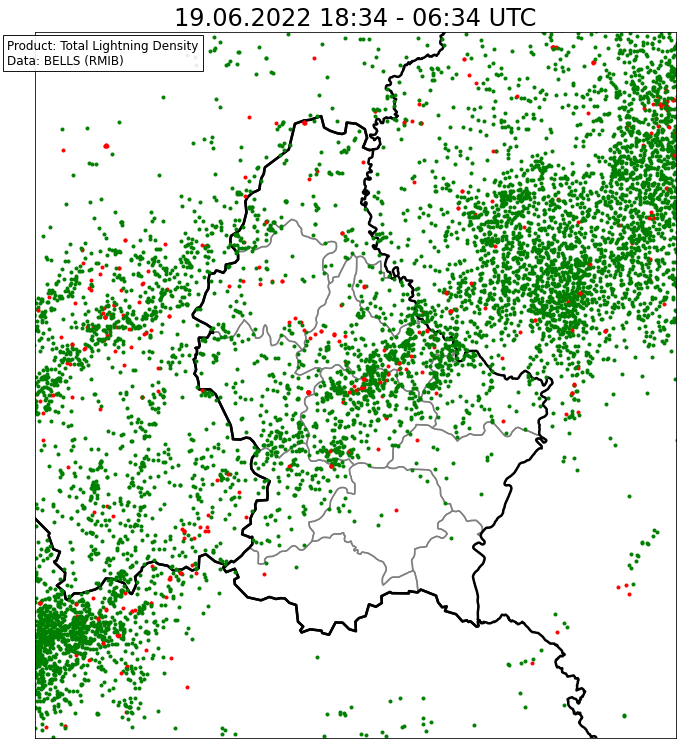

In [14]:
file_dir = '/home/lmathias/Documents/bells/'

# Changing the directory
os.chdir(file_dir)

nbins = 801 # 801=0.025°, 401=0.05°, 2001=0.01°
lon_bins = np.linspace(0, 20, nbins)
lat_bins = np.linspace(40, 60, nbins)

#print(lat_bins)

density, _, _ = np.histogram2d(lat_f, lon_f, [lat_bins, lon_bins])
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
density = np.where(density<=0, -10, density)


# convert the bin mesh to map coordinates:
xs, ys = bmaplux(lon_bins_2d, lat_bins_2d)
print(np.shape(xs))

cmap = plt.get_cmap('CMRmap_r')
newcmap = ListedColormap(cmap(np.linspace(0, 0.9, 44)))

colors=[(1,1,1),(0.0, 0.9254901960784314, 0.9254901960784314), 
                        (0.00392156862745098, 0.6274509803921569, 0.9647058823529412), 
                        (0.0, 0.0, 0.9647058823529412), 
                        (0.0, 1.0, 0.0), 
                        (0.0, 0.7843137254901961, 0.0), 
                        (0.0, 0.5647058823529412, 0.0), 
                        (1.0, 1.0, 0.0), 
                        (0.9058823529411765, 0.7529411764705882, 0.0), 
                        (1.0, 0.5647058823529412, 0.0), 
                        (1.0, 0.16078431372, 0.16078431372), 
                        (0.7529411764705882, 0.0, 0.0),
                        (0.59765625, 0.0, 0.0), 
                        (1.0, 0.0, 1.0), 
                        (0.6, 0.3333333333333333, 0.788235294117647),
                         (0.27,0,0.4)]
colors2 = [(1,1,1),
          (0.953,0.882,0.882),
          (0.933,0.784,0.792),
          (0.906,0.686,0.694),
          (0.871,0.584,0.592),
          (0.831,0.478,0.494),
          (0.784,0.369,0.388),
          (0.729,0.251,0.278),
          (0.643,0.141,0.184),
          (0.525,0.075,0.122),
          (0.412,0.000,0.047)]
           

cmap1 = ListedColormap(colors)
cmap2 = ListedColormap(colors2)
newcmap = ListedColormap(cmap1(np.linspace(0, 1, 16)))
bounds = [0,1,5,10,15,20,25,50,100,150,200,250,300,350,400,450,500]
norm = BoundaryNorm(bounds, newcmap.N)

fig1,ax = plt.subplots(figsize=(15,13))
#bmaplux.drawcountries(linewidth=2)
#bmaplux.drawcoastlines(linewidth=2)
#bmaplux.drawparallels(np.arange(-75,75,1))
#bmapeu.drawmeridians(np.arange(0,360,1))
bmaplux.readshapefile('gadm36_LUX_2','gadm36_LUX_2',linewidth=1.5, color='gray')
bmaplux.readshapefile('gadm36_LUX_0','gadm36_LUX_0',linewidth=2.5)
bmaplux.readshapefile('gadm36_FRA_0','gadm36_FRA_0',linewidth=2.5)
bmaplux.readshapefile('gadm36_BEL_0','gadm36_BEL_0',linewidth=2.5)

for i in range(size):
    if typ_f[i]==0:
        bmaplux.plot(x[i],y[i],'ro',markersize=3)
    else:
        bmaplux.plot(x[i],y[i],'go',markersize=3)

for xp, yp, h, m in zip(x, y, hour, mtyp):
        ax.scatter([xp], [yp], marker=m, color = 'red')

   
#pm = bmaplux.pcolormesh(xs, ys, density, ax=ax, norm=norm,cmap=newcmap)
#cb = plt.colorbar(pm, ax=ax, shrink=1, ticks=(0,1,5,10,15,20,25,50,100,150,200,250,300,350,400,450), pad=0.01, extend='max', orientation='vertical')
#cb.set_label("strokes per 0.025°x0.025°",fontsize=14)
#cb.ax.tick_params(labelsize=14)

plt.title(date2.strftime("%d.%m.%Y %H:%M")+date.strftime(" - %H:%M UTC") ,fontsize=24)
t=plt.gcf().text(0.19, 0.845, 'Product: Total Lightning Density\nData: BELLS (RMIB)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

file = 'bells_density_day.jpeg'
print(file)
plt.savefig(file, bbox_inches='tight',dpi=150)

(801, 801)


ModuleNotFoundError: No module named 'geopy'

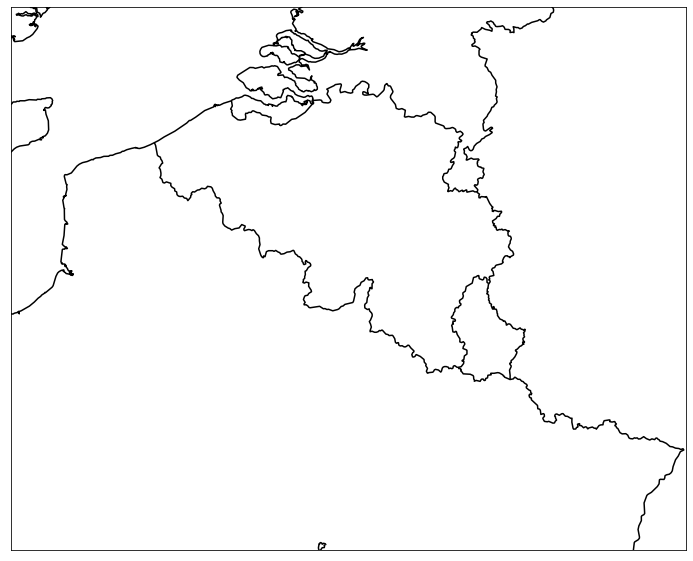

In [9]:
file_dir = '/home/lmathias/Documents/bells/'

# Changing the directory
os.chdir(file_dir)

nbins = 801 # 801=0.025°, 401=0.05°, 2001=0.01°
lon_bins = np.linspace(0, 20, nbins)
lat_bins = np.linspace(40, 60, nbins)

#print(lat_bins)

density, _, _ = np.histogram2d(lat_f, lon_f, [lat_bins, lon_bins])
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
density = np.where(density<=0, -10, density)

# convert the bin mesh to map coordinates:
xs, ys = bmapeu(lon_bins_2d, lat_bins_2d)
print(np.shape(xs))

cmap = plt.get_cmap('CMRmap_r')
newcmap = ListedColormap(cmap(np.linspace(0, 0.9, 44)))

colors=[(1,1,1),(0.0, 0.9254901960784314, 0.9254901960784314), 
                        (0.00392156862745098, 0.6274509803921569, 0.9647058823529412), 
                        (0.0, 0.0, 0.9647058823529412), 
                        (0.0, 1.0, 0.0), 
                        (0.0, 0.7843137254901961, 0.0), 
                        (0.0, 0.5647058823529412, 0.0), 
                        (1.0, 1.0, 0.0), 
                        (0.9058823529411765, 0.7529411764705882, 0.0), 
                        (1.0, 0.5647058823529412, 0.0), 
                        (1.0, 0.16078431372, 0.16078431372), 
                        (0.7529411764705882, 0.0, 0.0),
                        (0.59765625, 0.0, 0.0), 
                        (1.0, 0.0, 1.0), 
                        (0.6, 0.3333333333333333, 0.788235294117647),
                         (0.27,0,0.4)]
colors2 = [(1,1,1),
          (0.953,0.882,0.882),
          (0.933,0.784,0.792),
          (0.906,0.686,0.694),
          (0.871,0.584,0.592),
          (0.831,0.478,0.494),
          (0.784,0.369,0.388),
          (0.729,0.251,0.278),
          (0.643,0.141,0.184),
          (0.525,0.075,0.122),
          (0.412,0.000,0.047)]
           

cmap1 = ListedColormap(colors)
cmap2 = ListedColormap(colors2)
newcmap = ListedColormap(cmap1(np.linspace(0, 1, 16)))

fig1,ax = plt.subplots(figsize=(15,10))
bmapeu.drawcountries(linewidth=1.5)
bmapeu.drawcoastlines(linewidth=1.5)
#bmapeu.drawparallels(np.arange(-75,75,1))
#bmapeu.drawmeridians(np.arange(0,360,1))
# bmaplux.readshapefile('gadm36_LUX_2','gadm36_LUX_2')
# bmaplux.readshapefile('gadm36_LUX_0','gadm36_LUX_0',linewidth=3)
# bmaplux.readshapefile('gadm36_FRA_0','gadm36_FRA_0',linewidth=3)
# bmaplux.readshapefile('gadm36_BEL_0','gadm36_BEL_0',linewidth=3)
#bmapeu.plot(x,y,'ro',markersize=3, label='')

# for xp, yp, h, m in zip(x, y, hour, mtyp):
#         ax.scatter([xp], [yp], marker=m, color = 'red')

cities = [["Paris","P"],
          ["Brussels","B"],
          ["Luxembourg-City","L"],
          ["Cologne","C"]]

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="smy-application")
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = bmapeu(loc.longitude, loc.latitude)
    bmapeu.plot(x,y,marker='o',color='Black',markersize=3)
    ax.annotate(count, bmapeu(loc.longitude+.05, loc.latitude),color='black',fontsize=14)
   
pm = bmapeu.pcolormesh(xs, ys, density, ax=ax, vmin=-10, vmax=150, cmap=newcmap)
#pm = bmapeu.contourf(xs[0:nbins-1,0:nbins-1], ys[0:nbins-1,0:nbins-1], density, ax=ax,  levels=np.arange(-10,120,10), cmap=newcmap)
cb = plt.colorbar(pm, ax=ax, ticks=(0,10,20,30,40,50,60,70,80,90,100,110,120,130,140), shrink=1, pad=0.01, orientation='vertical',extend='max')
cb.set_label("strokes per 0.025°x0.025°",fontsize=12)
cb.ax.tick_params(labelsize=12)

plt.title(date2.strftime("%d.%m.%Y %H:%M")+date.strftime(" - %H:%M UTC") ,fontsize=20)
t=plt.gcf().text(0.16, 0.84, 'Product: Total Lightning Density\nData: BELLS (RMIB)', fontsize=10)
t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='black'))

file = 'bells_density_large_latest.jpeg'
print(file)
plt.savefig(file, bbox_inches='tight',dpi=100)